In [7]:
import numpy as np
import pandas as pd

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [2]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


(-0.5, 27.5, 27.5, -0.5)

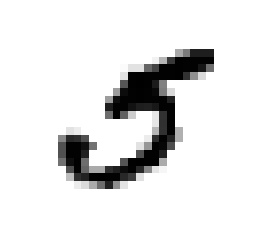

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape((28, 28))
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis("off")

In [5]:
y[36000]

5.0

In [21]:
def show_digit(digit_images, axes):
    for digit, ax in zip(digit_images, axes):
        ax.imshow(digit, cmap=mpl.cm.binary, interpolation='nearest')
        ax.axis('off')

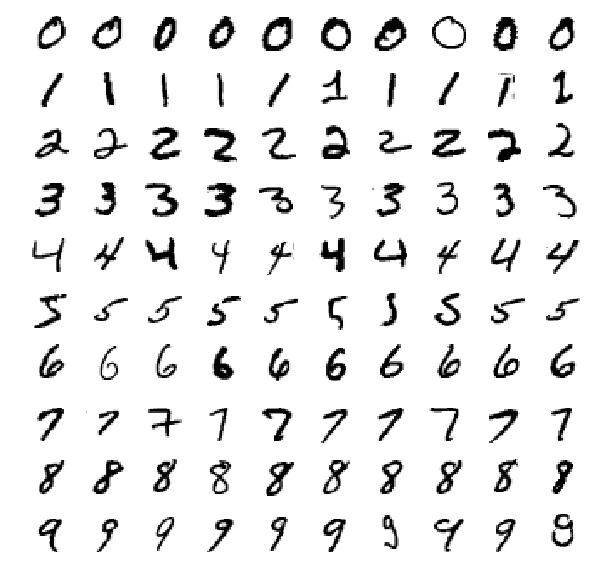

In [26]:
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
axes_all = axes.ravel()
for digit in range(10):
    digits = X[y == digit][:10].copy()
    digits_images = []
    axes, axes_all = axes_all[:10], axes_all[10:]
    for sample in digits:
        digits_images.append(sample.reshape((28, 28)))
    show_digit(digits_images, axes)

In [27]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [28]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [29]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [33]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [34]:
sgd_clf.predict([some_digit])

array([ True])

In [38]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred.shape

(60000,)

In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53829,   750],
       [ 1483,  3938]])

Precision and Recall:

In [40]:
from sklearn.metrics import precision_score, recall_score
print("Precision: ", precision_score(y_train_5, y_train_pred))
print("Recall: ", recall_score(y_train_5, y_train_pred))

Precision:  0.8400170648464164
Recall:  0.7264342372256042


In [41]:
from sklearn.metrics import f1_score
print("F1 score: ", f1_score(y_train_5, y_train_pred))

F1 score:  0.779107725788901


In [46]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
y_scores.shape

(60000,)

In [59]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [63]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label="Precision")
    plt.plot(thresholds, recalls[:-1], 'g-', label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc='center left')
    plt.ylim([0, 1])

(-700000, 700000)

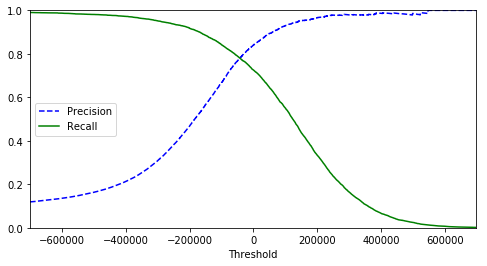

In [65]:
plt.figure(figsize=(8, 4));
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])